<a href="https://colab.research.google.com/github/HAN-GEONHUI/test/blob/t_academy_%EC%88%98%EC%97%85_pandas/20_DF_pivot_table(240903).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pandas
# --> 개별 데이터 수집 : web/ file
# --> 여러개의 DF에서 1개로 만드는 과정
#     단순 합치는 concat
#     특정 조건에서 합치는 merge : sql join
# ----------------------------------------------
# 원하는 /필요한 정보들을  DF.에 담자!!!!
# 기준 : 샘플별/데이터 중심!!!!

# ==> 이미 정리된  DF 에서 다시 판을 짜서,,탐색!!!!
#     내가 보고싶은 항목 중심으로 다시 보자!!!
# 기준 : 보고자하는 속성/컬럼/요소!!!!!!

# 위의 방식의 가장 대표적인 것 : 엑셀의 피봇테이블!!!!
# ==> 각각의 데이터/ 샘플별로 보는 것이 아니라!
#      내가 원하는 기준대로 샘플들이 어떤지 보자!!!!
# ==> 데이터 탐색의 중요한 부분!!! EDA

In [ ]:
# 참고) EDA프로젝트
# ==> 수집한 데이터를 상당히 열심히 이리/저리 봤다!!!!!
# ==> ML 어떤 중요한 특징을 찾느냐!!!!
# 단, 정답은 없음!!!!
# 직접 본인이 이리 저리 파고들어가야 함!!!
# ==> 생각만큼 특이한 사항이 잘 안 나옴!!!
#     특색있는 발견을 하는게 중요!!!!
# 본인의 관심정도 & 도메인지식!!!!!!

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 본인 환경에 맞는 11.slaes_funnel.xlsx 파일 불러오기
# ==> 어느 시트인지 체크해서 불러와야 함!
path = '/content/11_sales-funnel.xlsx'
data = pd.read_excel( path, sheet_name ="Sheet1")
data.head()


,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Account   17 non-null     int64 
 1   Name      17 non-null     object
 2   Rep       17 non-null     object
 3   Manager   17 non-null     object
 4   Product   17 non-null     object
 5   Quantity  17 non-null     int64 
 6   Price     17 non-null     int64 
 7   Status    17 non-null     object
dtypes: int64(3), object(5)
memory usage: 1.2+ KB


In [ ]:
# 목적 : 매출 관련 데이터를 중심으로 인사 평가를 해보자!
#      ==> 본인이 인사팀장의 관점으로 바라보자!

In [ ]:
# 데이터에 대한 간략한 설명
# Account : 고객의 계좌번호
# Name : 고객의 이름
# Rep: 영업 담당자(실무 영어사원)
# manager: 영업 담당자의 팀장
# product: 판매한 물건
# quantity: 판매한 물건의 수량
# Price    : 판매한 물건의 가격
# Status   : 현재 진행 상황

In [ ]:
# pivot_table을 활용해서 새롭게 판을 짜는 방식!
# 1. 가로에 무엇을 볼지
# 2. 세로에 무엇을 볼지
# 3. 1/2에 의해서 만들어진 공간을 어떻게 채울까!
#    ==> 여러개의 원본 데이터들을 어떻게 집계처리해서 칸 대표화!

# pandas 2.x
# --> 예전에는 대충, 가로만 세팅해도 알아서 세로하고, 값들 처리
# --> FM : 가로 세팅, 세로 세팅, 무엇을 볼지 명시!

In [ ]:
# 참고) 지금 pandas 2.x에서는 안 돌아가는 코드
# ===> 지금은 명확하게 다 작성해야 돌아감!!!
pd.pivot_table( data, index=["Manager"])

TypeError: agg function failed [how->mean,dtype->object]

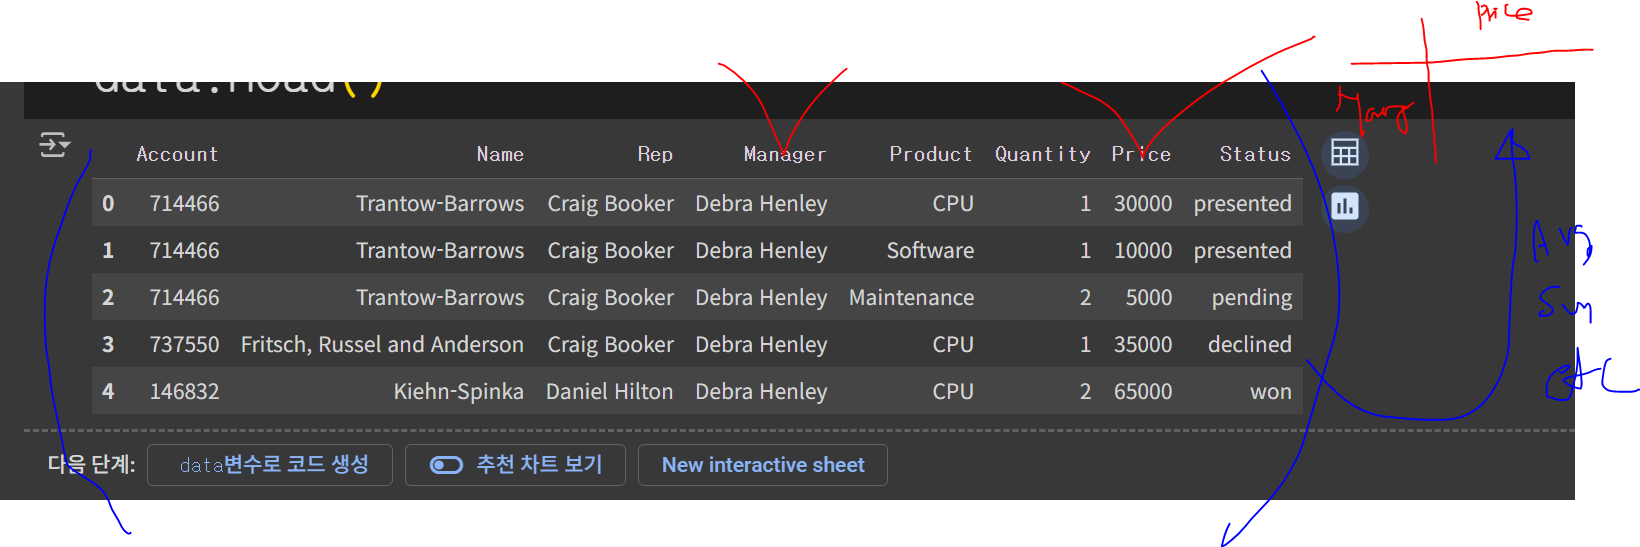

In [ ]:
# Q) 팀장들에 대해서 팀에 속한 매출액을 보고 싶다!
# --> 평가의 기준이 오로지 매출
# --> 값들에 대해서 특별하게 지정하지 않으면 : 평균!
pd.pivot_table(data, index=["Manager"], values=["Price"] )

,Price
Manager,
Debra Henley,26111.111111
Fred Anderson,35875.000000


In [ ]:
# FM적으로 pivot_table에 대한 속성값
# index : 가로줄에 대한 세팅 --> 보려는 기준
# values : 세로줄에 대한 세팅 --> 보려는 속성
# aggfunc : 어떻게 여러 값을 집계해서 채울까
# + columns : 속성별로 나눠서 보자!!!!분류용

In [ ]:
pd.pivot_table(data, index=["Manager"], values=["Price"],
               aggfunc=[np.mean])
# pandas 2.초반 버전..

<ipython-input-6-2169dad7ca5d>:1: FutureWarning: The provided callable <function mean at 0x78fc4d31fd90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(data, index=["Manager"], values=["Price"],


,mean
,Price
Manager,
Debra Henley,26111.111111
Fred Anderson,35875.000000


In [ ]:
pd.pivot_table(data, index=["Manager"], values=["Price"],
               aggfunc=["mean"])

,mean
,Price
Manager,
Debra Henley,26111.111111
Fred Anderson,35875.000000


In [ ]:
# 영업 팀장별로, 총 매출액의 합을 보자!
pd.pivot_table(data, index=["Manager"], values=["Price"],
               aggfunc=["sum"])

,sum
,Price
Manager,
Debra Henley,235000
Fred Anderson,287000


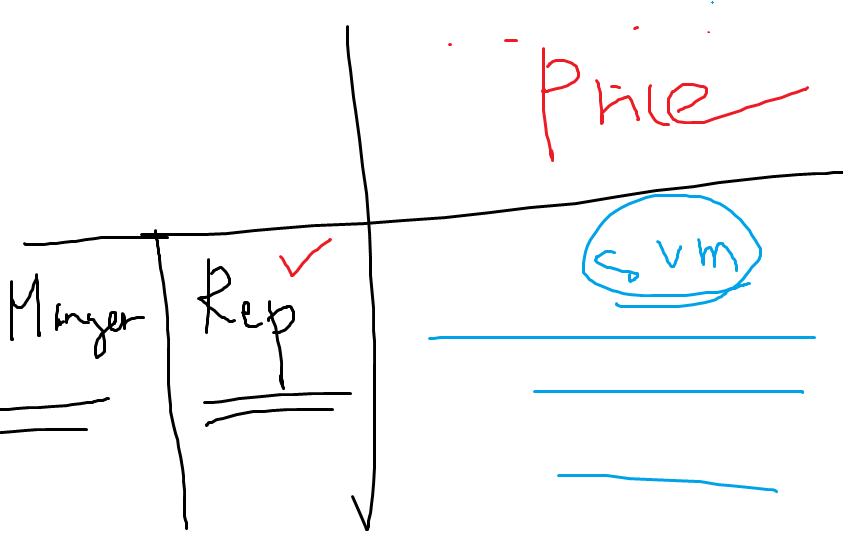

In [ ]:
# 가로에 : 영업팀장로 '영업사원'에 대한 매출액을 보고 싶다
# ==> 매출액은 총계로 처리를 하자!
pd.pivot_table( data, index=["Manager","Rep"],
               values =["Price"],
                aggfunc=["sum"])

sum
                              Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [ ]:
pd.pivot_table( data, index=["Rep","Manager"],
               values =["Price"],
                aggfunc=["sum"])

,,sum
,,Price
Rep,Manager,
Cedric Moss,Fred Anderson,110000
Craig Booker,Debra Henley,80000
Daniel Hilton,Debra Henley,115000
John Smith,Debra Henley,40000
Wendy Yule,Fred Anderson,177000


In [ ]:
# 단순 총 매출액만 보는 것이 아니라..
# ==> 꾸준한 영업활동을 하면서, 매출액도 높은지,,,
#     운이 좋아서 1건 크게 한 것인지...
pd.pivot_table( data, index=["Manager","Rep"],
               values =["Price"],
                aggfunc=["sum","count"])

sum count
                              Price Price
Manager       Rep                        
Debra Henley  Craig Booker    80000     4
              Daniel Hilton  115000     3
              John Smith      40000     2
Fred Anderson Cedric Moss    110000     4
              Wendy Yule     177000     4

In [ ]:
#매출 실적에 대해서 보기는 하는데-> 판매 상품의 종류별로 자세히 보고 싶다!
#                                -> 구체적으로 어느 상품군을 잘 팔고 ,어느 상품군을 잘 안파는지 확인해보자
pd.pivot_table( data, index=["Manager","Rep"],
               values =["Price"],#--> 일반적인 수치형컬럼
                columns = ["Product"],#카테고리형 컬럼
                aggfunc=["sum"])

sum                             
                                Price                             
Product                           CPU Maintenance Monitor Software
Manager       Rep                                                 
Debra Henley  Craig Booker    65000.0      5000.0     NaN  10000.0
              Daniel Hilton  105000.0         NaN     NaN  10000.0
              John Smith      35000.0      5000.0     NaN      NaN
Fred Anderson Cedric Moss     95000.0      5000.0     NaN  10000.0
              Wendy Yule     165000.0      7000.0  5000.0      NaN

In [ ]:
# + 누락된 칸이 발생하면,,NaN 나타나서 보기가 별로다
pd.pivot_table( data, index=["Manager","Rep"],
               values =["Price"], # --> 일반적인 수치형컬럼
                columns = ["Product"],# --> 카테고리형 컬럼
                aggfunc=["sum"],
                fill_value=0)

sum                             
                              Price                             
Product                         CPU Maintenance Monitor Software
Manager       Rep                                               
Debra Henley  Craig Booker    65000        5000       0    10000
              Daniel Hilton  105000           0       0    10000
              John Smith      35000        5000       0        0
Fred Anderson Cedric Moss     95000        5000       0    10000
              Wendy Yule     165000        7000    5000        0

In [ ]:
#참고)내가 보고자하는 항목을 좀 늘려보겠습니다.
#--> 속성에서 Price만 봤는데
#--> 판매한 수량 Quantity
#++ 상품별로 쪼개서
pd.pivot_table( data, index=["Manager","Rep"],
               values =["Price","Quantity"], # --> 일반적인 수치형컬럼
                columns = ["Product"],# --> 카테고리형 컬럼
                aggfunc=["sum"],
                fill_value=0)

sum                                        \
                              Price                              Quantity   
Product                         CPU Maintenance Monitor Software      CPU   
Manager       Rep                                                           
Debra Henley  Craig Booker    65000        5000       0    10000        2   
              Daniel Hilton  105000           0       0    10000        4   
              John Smith      35000        5000       0        0        1   
Fred Anderson Cedric Moss     95000        5000       0    10000        3   
              Wendy Yule     165000        7000    5000        0        7   

                                                          
                                                          
Product                     Maintenance Monitor Software  
Manager       Rep                                         
Debra Henley  Craig Booker            2       0        1  
              Daniel Hilton           0       0        1  
              John Smith              2       0        0  
Fred Anderson Cedric Moss             1       0        1  
              Wendy Yule              3       2        0

In [ ]:
# + 맨 밑에 총계
pd.pivot_table( data, index=["Manager","Rep"],
               values =["Price", "Quantity"], # --> 일반적인 수치형컬럼
                columns = ["Product"],# --> 카테고리형 컬럼
                aggfunc=["sum"],
                fill_value=0,
                margins=True)

sum                                       \
                              Price                                        
Product                         CPU Maintenance Monitor Software     All   
Manager       Rep                                                          
Debra Henley  Craig Booker    65000        5000       0    10000   80000   
              Daniel Hilton  105000           0       0    10000  115000   
              John Smith      35000        5000       0        0   40000   
Fred Anderson Cedric Moss     95000        5000       0    10000  110000   
              Wendy Yule     165000        7000    5000        0  177000   
All                          465000       22000    5000    30000  522000   

                                                                       
                            Quantity                                   
Product                          CPU Maintenance Monitor Software All  
Manager       Rep                                                      
Debra Henley  Craig Booker         2           2       0        1   5  
              Daniel Hilton        4           0       0        1   5  
              John Smith           1           2       0        0   3  
Fred Anderson Cedric Moss          3           1       0        1   5  
              Wendy Yule           7           3       2        0  12  
All                               17           8       2        3  30

In [ ]:
## 집계처리를 하고자하는 방식이 보려는 속성/항목별로 다르게 하고 싶다!
#--> price:평균,총계
#-->quantity:총계
#--------> dict로 쌍에 대한 구조 표현!

In [ ]:
pd.pivot_table( data, index=["Manager","Rep"],
               values =["Price", "Quantity"], # --> 일반적인 수치형컬럼
                columns = ["Product"],# --> 카테고리형 컬럼
                aggfunc={
                    "Price":["mean","sum"],
                    "Quantity":["sum"]
                },
                fill_value=0)

Price                                       \
                                mean                                  sum   
Product                          CPU Maintenance Monitor Software     CPU   
Manager       Rep                                                           
Debra Henley  Craig Booker   32500.0      5000.0     0.0  10000.0   65000   
              Daniel Hilton  52500.0         0.0     0.0  10000.0  105000   
              John Smith     35000.0      5000.0     0.0      0.0   35000   
Fred Anderson Cedric Moss    47500.0      5000.0     0.0  10000.0   95000   
              Wendy Yule     82500.0      7000.0  5000.0      0.0  165000   

                                                          
                                                          
Product                     Maintenance Monitor Software  
Manager       Rep                                         
Debra Henley  Craig Booker         5000       0    10000  
              Daniel Hilton           0       0    10000  
              John Smith           5000       0        0  
Fred Anderson Cedric Moss          5000       0    10000  
              Wendy Yule           7000    5000        0

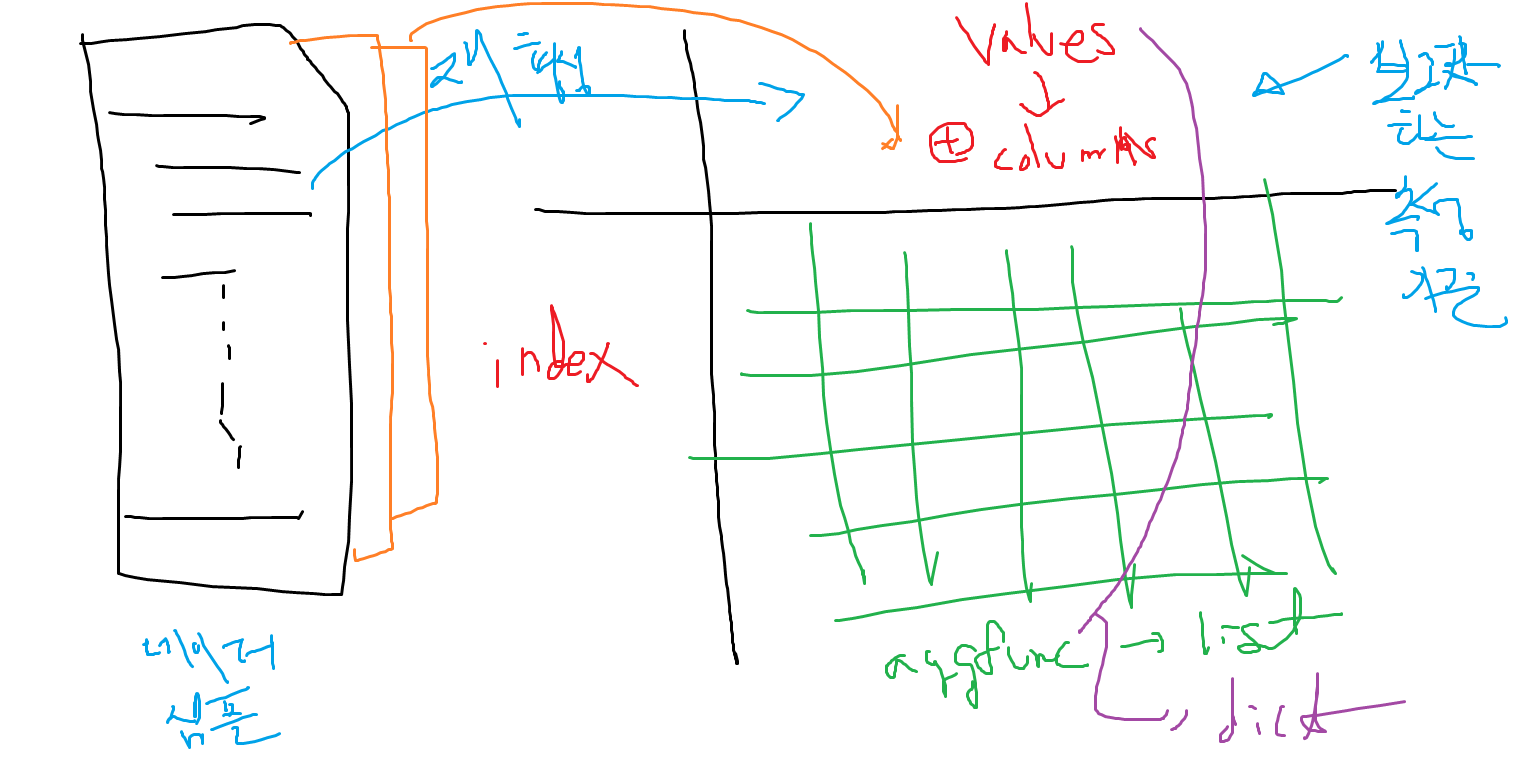

In [ ]:
### pivot_table 의 목적 ###
# ===> 수집된 데이터를 내가 보고자 하는 "항목 중심"으로 바라보자!!!
#      가로 : index
#      세로 : values + 항목별 쪼개서 : columns
#      --> aggfunc : 새로운 판에 칸을 무엇을 채울지
#기존에 있는 항목이 아니라 새롭게 본인이 직접 만들 컬럼에 대해서도 생성하고 하면 안돼!
#수집한 데이터는 여러속성/탐색